# Exploratory Data Analysis

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wholesale_data.csv')

In [3]:
df.head()

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,6048141,2017,12669,9656,7561,214,2674,1338
1,2,9336325,2017,7057,9810,9568,1762,3293,1776
2,2,6272942,2017,6353,8808,7684,2405,3516,7844
3,1,7856217,2017,13265,1196,4221,6404,507,1788
4,2,6179511,2017,22615,5410,7198,3915,1777,5185


In [5]:
df.describe(include='all')

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,801.000000,8.010000e+02,801,799,798,798,798,799,797
unique,NaN,NaN,2,773,755,768,731,694,680
top,NaN,NaN,2017,3,3289,935,unrecorded,56,834
freq,NaN,NaN,440,3,3,3,5,5,4
mean,1.344569,5.327841e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.475525,2.544952e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.133724e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,3.278814e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,5.259389e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,7.309127e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 9 columns):
Channel             801 non-null int64
Customer            801 non-null int64
Year                801 non-null object
Fresh               799 non-null object
Milk                798 non-null object
Grocery             798 non-null object
Frozen              798 non-null object
Detergents_Paper    799 non-null object
Delicassen          797 non-null object
dtypes: int64(2), object(7)
memory usage: 56.4+ KB


In [9]:
#count number of rows that have null (unknown) values
df.isnull().any(axis=1).sum() 

17

About 2% of entries have at least one null value.  Those null values are recorded as the string 'unrecorded' in the csv.  Rewrite these values as Null.

In [31]:
df = df.replace(to_replace='unrecorded',value=None)

In [33]:
df.sample(500)

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
145,2,6914374,2017,22039,8384,34792,42,12591,4430
635,1,4703268,08/01/2016,18215,4574,2824,4417,284,1492
120,1,4872761,2017,17160,1200,3412,2417,174,1136
747,1,9859593,08/01/2016,13515,1828,1989,1034,291,629
156,2,4226386,2017,3830,5291,14855,317,6694,3182
643,1,8121500,08/01/2016,554,473,1440,460,773,16
578,1,7747261,08/01/2016,13672,2767,4279,110,174,2911
610,2,6639173,08/01/2016,200,5726,11013,792,5822,284
509,1,6348544,08/01/2016,8185,1918,776,530,374,112
195,1,4703268,2017,17023,5139,5230,7888,330,1755


In [42]:
df.tail(20)

,Channel,Customer,Year,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
781,2,2129989,08/01/2016,3426.0,2938.0,31630.0,92.0,20956.0,535.0
782,1,4357489,08/01/2016,11944.0,418.0,1179.0,5548.0,276.0,1848.0
783,2,2597908,08/01/2016,11645.0,3272.0,5611.0,710.0,2467.0,791.0
784,1,6092144,08/01/2016,9779.0,1088.0,705.0,403.0,115.0,451.0
785,1,9057098,08/01/2016,3927.0,552.0,1619.0,5556.0,261.0,668.0
786,2,6029616,08/01/2016,2.0,117.0,4985.0,9985.0,5.0,385.0
787,1,9791263,08/01/2016,1387.0,808.0,2933.0,7284.0,309.0,1631.0
788,1,7021780,08/01/2016,309.0,1811.0,7639.0,221.0,3417.0,562.0
789,1,2160733,08/01/2016,1786.0,4265.0,4720.0,437.0,4026.0,971.0
790,1,8746100,08/01/2016,199.0,3570.0,4146.0,258.0,3492.0,1036.0


In [39]:
df = df.astype(copy=False,
          dtype={'Fresh': 'float', 
           'Milk':'float', 
           'Grocery':'float',
           'Frozen':'float',
           'Detergents_Paper':'float',
           'Delicassen':'float'})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 9 columns):
Channel             801 non-null int64
Customer            801 non-null int64
Year                801 non-null object
Fresh               799 non-null float64
Milk                798 non-null float64
Grocery             798 non-null float64
Frozen              798 non-null float64
Detergents_Paper    799 non-null float64
Delicassen          797 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 56.4+ KB


In [179]:
print(df.nunique())
print(476*2)

Channel               2
Customer            476
Year                  2
Fresh               759
Milk                743
Grocery             753
Frozen              720
Detergents_Paper    683
Delicassen          671
dtype: int64
952


In [190]:
df.Year.unique()

array(['2017', '08/01/2016'], dtype=object)

In [43]:
df.describe()

,Channel,Customer,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,801.000000,8.010000e+02,799.000000,798.000000,798.000000,798.000000,799.000000,797.000000
mean,1.344569,5.327841e+06,11083.237797,5193.488722,7187.330827,2656.472431,2710.409262,1352.084065
std,0.475525,2.544952e+06,12030.608720,6798.561216,8809.843432,4266.192050,4463.846591,2627.793696
min,1.000000,1.133724e+06,2.000000,52.000000,2.000000,25.000000,2.000000,2.000000
25%,1.000000,3.278814e+06,2826.000000,1364.500000,1991.000000,597.750000,238.000000,372.000000
50%,1.000000,5.259389e+06,7565.000000,3199.000000,4284.500000,1292.500000,759.000000,834.000000
75%,2.000000,7.309127e+06,15272.500000,6456.250000,9467.000000,3017.250000,3602.000000,1603.000000
max,2.000000,9.990301e+06,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CD9974BA8>,
      dtype=object)

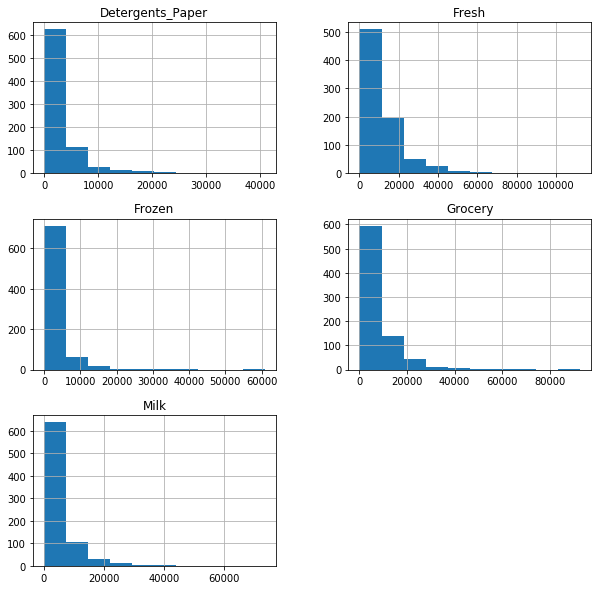

In [52]:
df.hist(df.columns[2:-1],figsize=(10,10))

In [53]:
df.dropna(inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 800
Data columns (total 9 columns):
Channel             784 non-null int64
Customer            784 non-null int64
Year                784 non-null object
Fresh               784 non-null float64
Milk                784 non-null float64
Grocery             784 non-null float64
Frozen              784 non-null float64
Detergents_Paper    784 non-null float64
Delicassen          784 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 61.2+ KB


In [55]:
df.describe()

,Channel,Customer,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,784.000000,7.840000e+02,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,1.346939,5.327376e+06,11025.417092,5227.094388,7238.278061,2655.909439,2734.278061,1351.996173
std,0.476300,2.536148e+06,11973.591793,6841.063333,8859.030099,4295.097511,4494.144018,2643.135947
min,1.000000,1.133724e+06,2.000000,52.000000,2.000000,25.000000,2.000000,2.000000
25%,1.000000,3.285396e+06,2812.000000,1370.500000,1999.250000,583.000000,238.500000,372.000000
50%,1.000000,5.250036e+06,7458.000000,3207.500000,4349.500000,1288.500000,762.000000,834.000000
75%,2.000000,7.305151e+06,15187.250000,6480.750000,9509.500000,3013.750000,3626.750000,1603.250000
max,2.000000,9.990301e+06,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


At this point, df is cleaned with the expenses columns converted to float and the unrecorded entries dropped

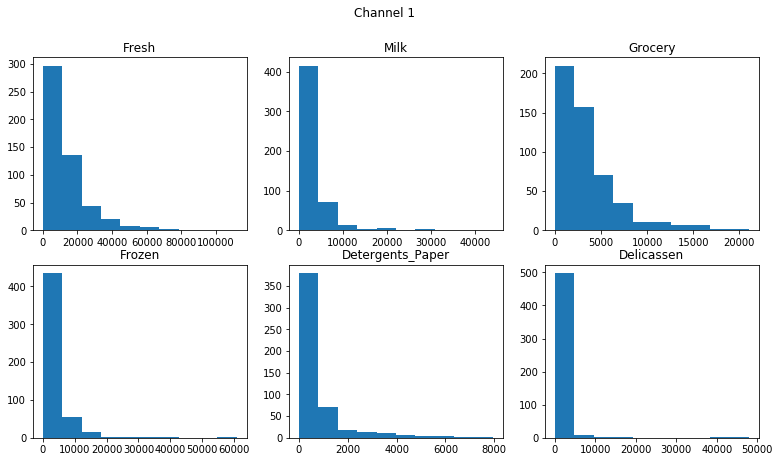

In [76]:
#examine the distribution of expenses by channel 1
plt.figure(figsize=(13,7))
plt.suptitle('Channel 1')
for i in range(3,9):
    data = df.loc[df['Channel'] == 1,df.columns[i]]
    plt.subplot(2,3,i-2)
    plt.hist(data)
    plt.title(df.columns[i])

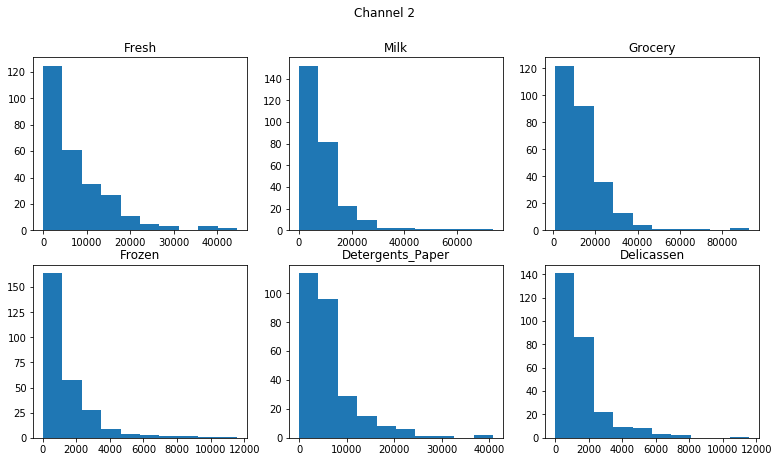

In [77]:
#examine the distribution of expenses by channel 2
plt.figure(figsize=(13,7))
plt.suptitle('Channel 2')
for i in range(3,9):
    data = df.loc[df['Channel'] == 2,df.columns[i]]
    plt.subplot(2,3,i-2)
    plt.hist(data)
    plt.title(df.columns[i])

Text(0.5, 1.0, 'Number of customers in each channel')

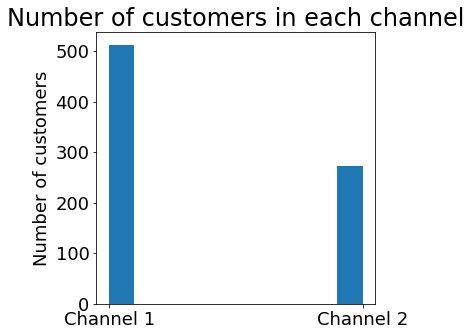

In [228]:
#ax = df[['Channel']].plot.hist(bins=3)
#ax.set_xticks([1,2])
#ax.set_xticklabels(['Channel 1','Channel 2'])

data = df[['Channel']]
plt.figure(figsize=(5,5))
plt.hist(data.values)
plt.xticks([1,2],['Channel 1','Channel 2'],FontSize=18)
plt.ylabel('Counts',FontSize=24)
plt.yticks(FontSize=18)
plt.ylabel('Number of customers',FontSize=18)
plt.title('Number of customers in each channel',FontSize=24)

Since channel 1 orders less detergents_paper than channel 2, let's assume that channel 1 is restaurants/hotels and channel 2 is retail.  Hotels/restaurants probably order relatively less detergents_paper than retail stores.

### normalize expenses by total amount each company spent to get what percent they spend on each category

In [132]:
ind = [0] + list(np.arange(3,len(df.columns)))
df_categories = df[df.columns[ind]]
df_categories.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [139]:
df_cat_ch1 = df_categories.loc[df_categories['Channel']==1,df_categories.columns[1:]]
df_cat_ch2 = df_categories.loc[df_categories['Channel']==2,df_categories.columns[1:]]

In [140]:
df_cat_ch1 = df_cat_ch1.div(df_cat_ch1.sum(axis=1), axis=0)
df_cat_ch2 = df_cat_ch2.div(df_cat_ch2.sum(axis=1), axis=0)

In [141]:
df_cat_ch1.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.472429,0.137864,0.170954,0.130395,0.038698,0.049659
std,0.239811,0.115210,0.125474,0.121018,0.058357,0.044581
min,0.000128,0.004864,0.000078,0.000802,0.000111,0.000044
25%,0.275905,0.056059,0.080593,0.041858,0.008615,0.019617
50%,0.509645,0.093812,0.132503,0.091276,0.018309,0.039300
75%,0.668969,0.199315,0.228721,0.187491,0.038832,0.063057
max,0.953158,0.631162,0.738939,0.663223,0.533080,0.313002


In [142]:
df_cat_ch2.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.198071,0.219752,0.343121,0.044506,0.154380,0.040171
std,0.174278,0.092131,0.111390,0.063018,0.080211,0.035961
min,0.000129,0.007559,0.064884,0.000291,0.000323,0.000055
25%,0.057311,0.152358,0.264872,0.013653,0.100308,0.014536
50%,0.145501,0.221894,0.340784,0.028011,0.153027,0.029534
75%,0.305703,0.272272,0.415171,0.051342,0.198105,0.058828
max,0.779086,0.524519,0.728367,0.645068,0.407218,0.223863


Based on results from the two cells above, it seems that customers from channel 1 (Hotels/Restaurants) spend the majority of their purchases on Fresh products.  Customers from channel 2 (retails) spread out their purchases among Fresh, Milk, Grocery.

Incentivising the largest subgroup (channel 1, Hotels/Restaurants) may be attractive since this may encourage more spending in other categories.

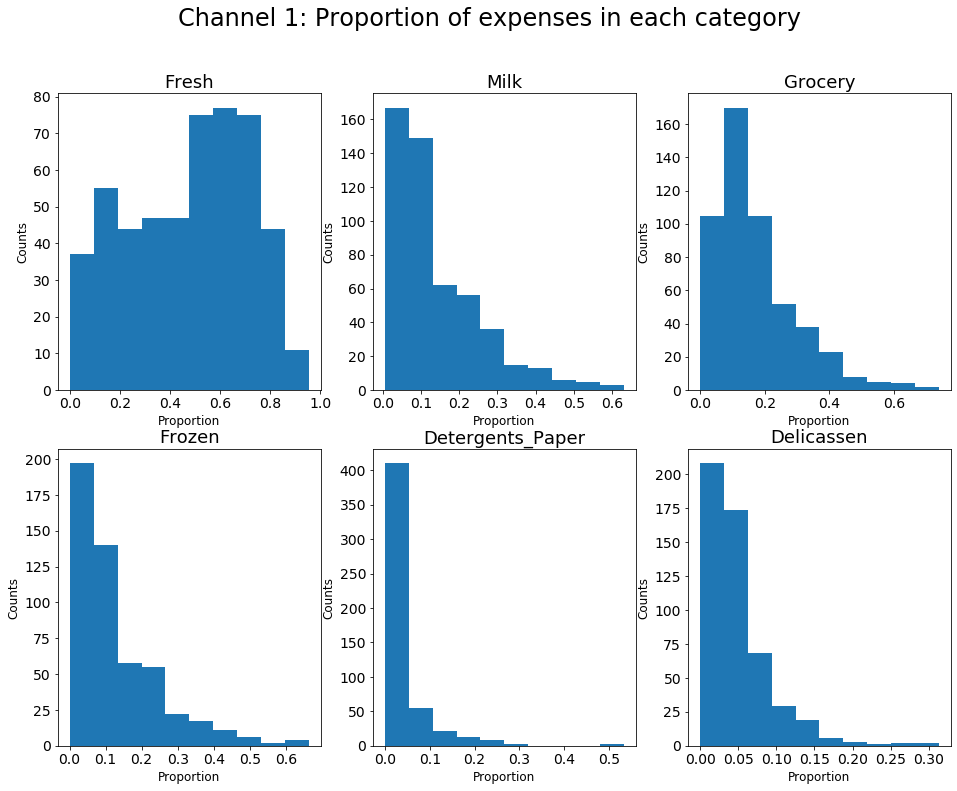

In [236]:
#examine the distribution of expenses by channel 1
plt.figure(figsize=(16,12))
plt.suptitle('Channel 1: Proportion of expenses in each category',fontsize=24)
for i in range(3,9):
    data = df_cat_ch1.loc[:,df.columns[i]]
    plt.subplot(2,3,i-2)
    plt.hist(data)
    plt.title(df.columns[i],FontSize=18)
    plt.xlabel('Proportion',FontSize=12)
    plt.ylabel('Counts',FontSize=12)
    plt.xticks(FontSize=14)
    plt.yticks(FontSize=14)

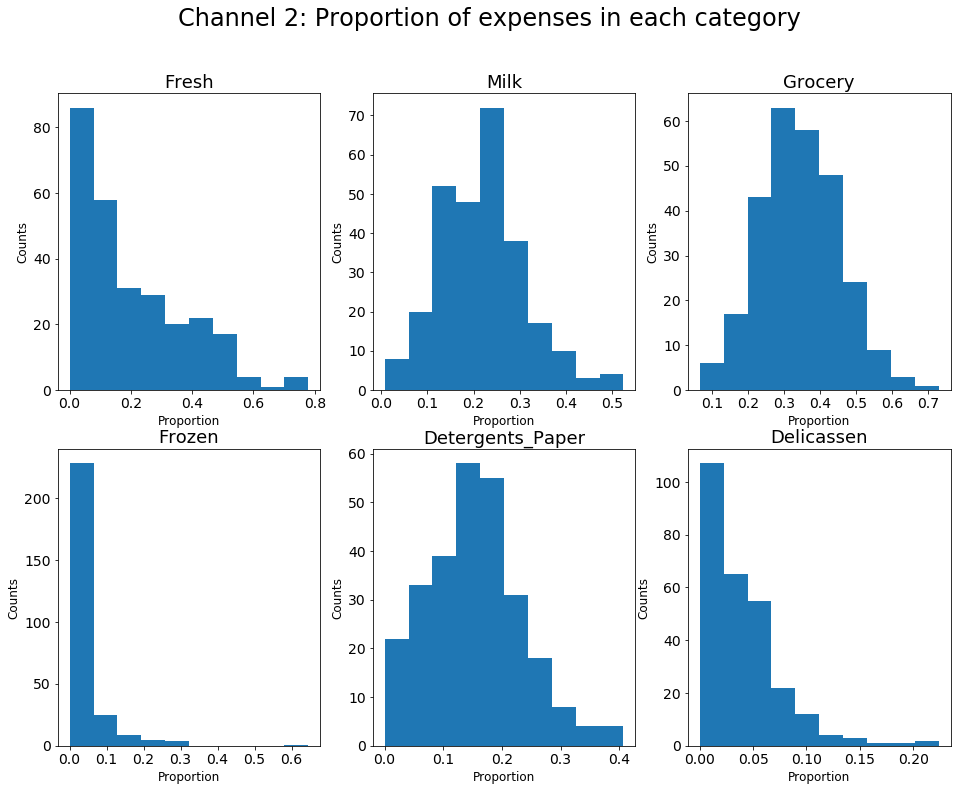

In [238]:
#examine the distribution of expenses by channel 2
plt.figure(figsize=(16,12))
plt.suptitle('Channel 2: Proportion of expenses in each category',fontsize=24)
for i in range(3,9):
    data = df_cat_ch2.loc[:,df.columns[i]]
    plt.subplot(2,3,i-2)
    plt.hist(data)
    plt.title(df.columns[i],FontSize=18)
    plt.xlabel('Proportion',FontSize=12)
    plt.ylabel('Counts',FontSize=12)
    plt.xticks(FontSize=14)
    plt.yticks(FontSize=14)

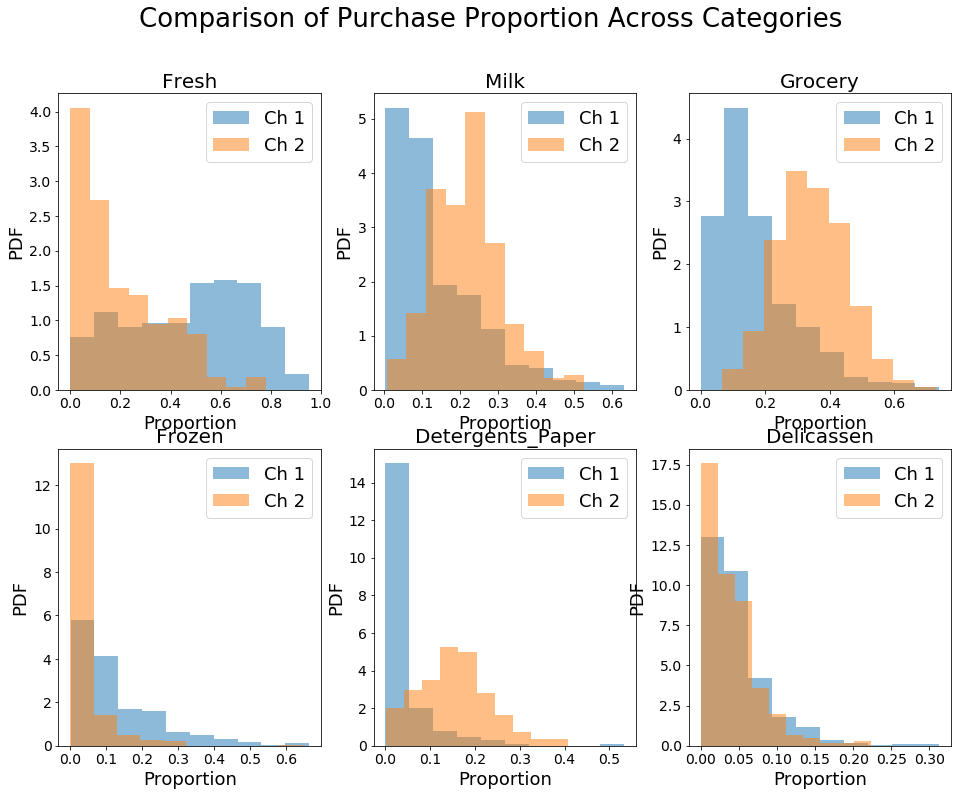

In [241]:
#plot channel 1 and channel 2 histograms on same figures to see comparisons more easily
plt.figure(figsize=(16,12))
plt.suptitle('Comparison of Purchase Proportion Across Categories',fontsize=26)
for i in range(3,9):
    data1 = df_cat_ch1.loc[:,df.columns[i]]
    data2 = df_cat_ch2.loc[:,df.columns[i]]
    plt.subplot(2,3,i-2)
    plt.hist(data1,label='Ch 1',alpha=0.5,density=True)
    plt.hist(data2,label='Ch 2',alpha=0.5,density=True)
    plt.title(df.columns[i],FontSize=20)
    plt.legend(fontsize=18)
    plt.xlabel('Proportion',FontSize=18)
    plt.ylabel('PDF',FontSize=18)
    plt.xticks(FontSize=14)
    plt.yticks(FontSize=14)

~1.5 hours left

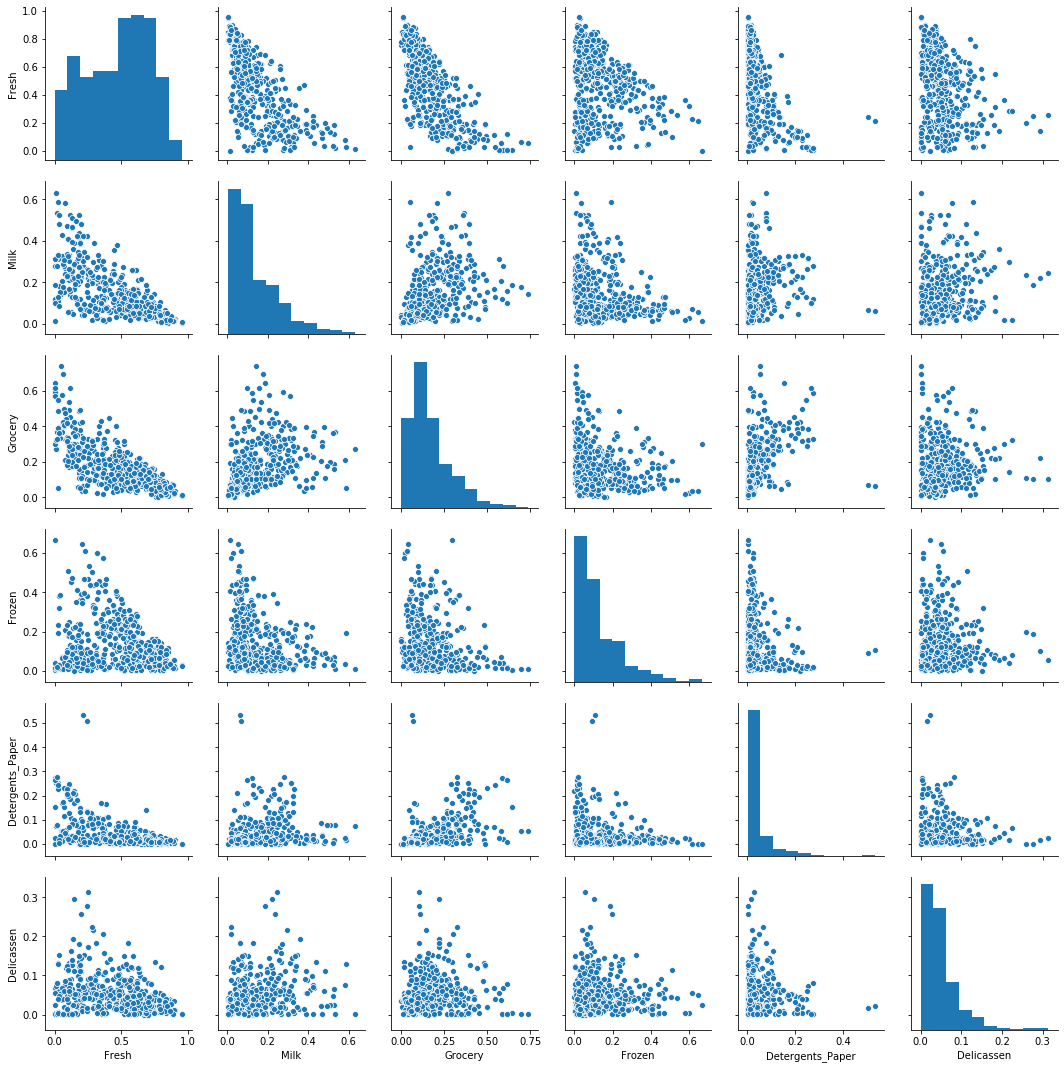

In [166]:
import seaborn as sns

sns.pairplot(df_cat_ch1)

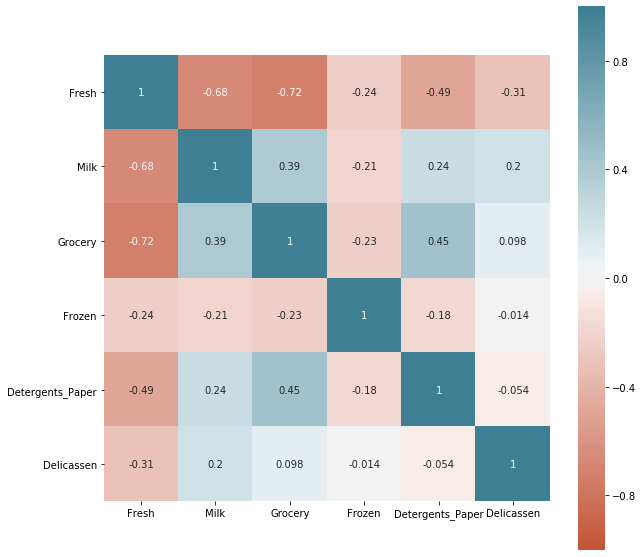

In [176]:
plt.figure(figsize=(10,10))
sns.heatmap(df_cat_ch1.corr(),vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True)

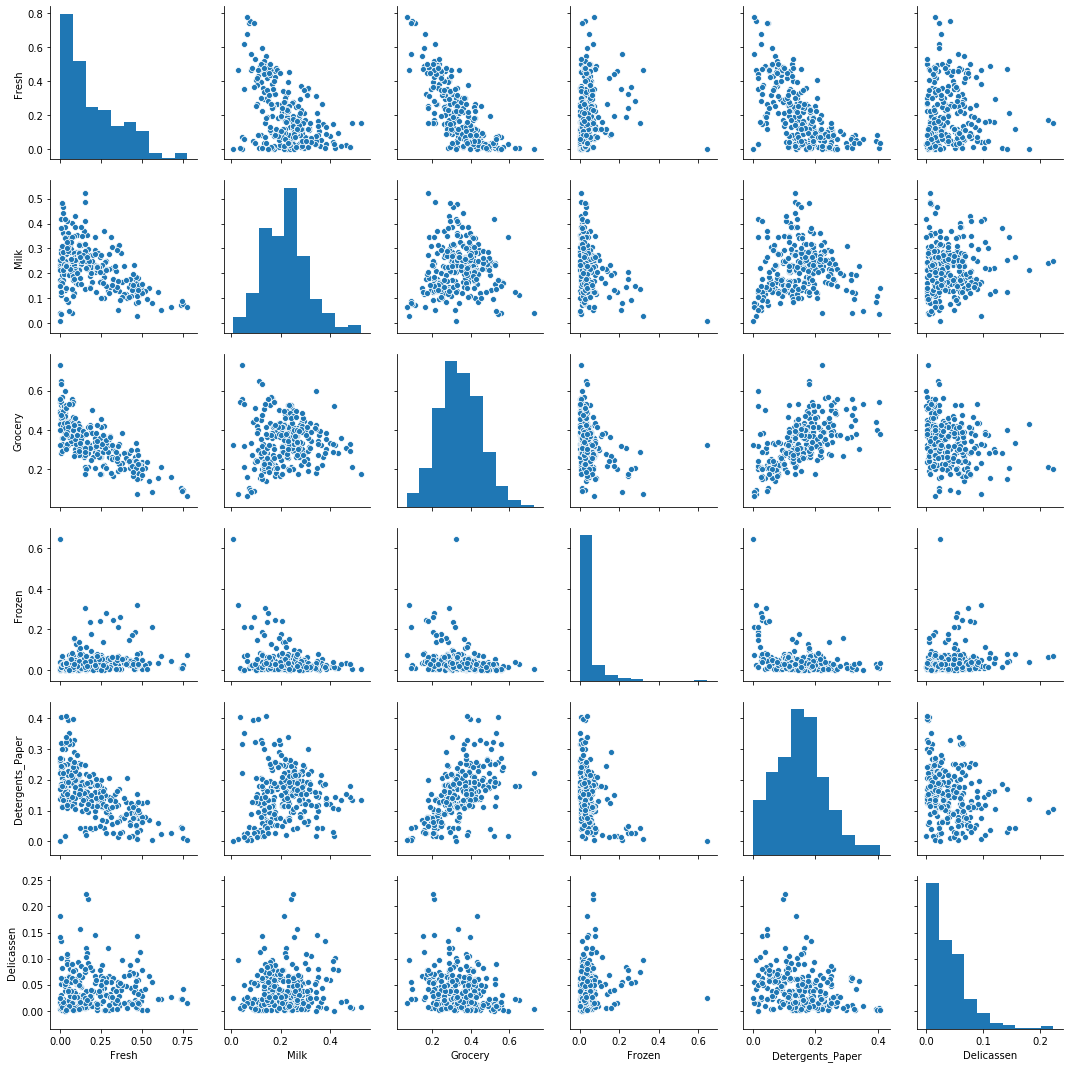

In [167]:
import seaborn as sns

sns.pairplot(df_cat_ch2)

~30 min left

## Analysis

In [2]:
test = -54
s = str(test)
print(s[::-1])

45-
